<a href="https://colab.research.google.com/github/lamaachi/MyDataScience_Projects/blob/main/GPTvsROBERTAvsT5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from transformers import RobertaTokenizer, RobertaForCausalLM, T5Tokenizer, T5ForConditionalGeneration
import torch
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt

# RoBERTa Generation


In [18]:
def generate_text_roberta(prompt):
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    model = RobertaForCausalLM.from_pretrained('roberta-base')

    inputs = tokenizer(prompt, return_tensors="pt", max_length=50, truncation=True,)
    outputs = model.generate(
        inputs.input_ids,
        max_length=50,
        do_sample=True,
        top_k=50
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# T5 Generation

In [19]:
def generate_text_t5(prompt):
    tokenizer = T5Tokenizer.from_pretrained('t5-small')
    model = T5ForConditionalGeneration.from_pretrained('t5-small')

    inputs = tokenizer(prompt, return_tensors="pt", max_length=50, truncation=True)
    outputs = model.generate(
        inputs.input_ids,
        max_length=50,
        num_beams=4,
        early_stopping=True
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# BLEU Score Computation

In [20]:
def calculer_blue(reference, candidate):
    reference = reference.split()
    print(f'references :{reference}')
    candidate = candidate.split()
    return sentence_bleu([reference], candidate)

In [21]:
prompt = "Once upon a time, in a galaxy far, far away, there was an advanced civilization that lived in harmony with nature."

In [22]:
# generer de text
roberta_output = generate_text_roberta(prompt)
t5_output = generate_text_t5(prompt)

reference_text = roberta_output
print(f'roberta reféference : {reference_text} ')
scores = {
        'RoBERTa': calculer_blue(reference_text, roberta_output),
        'T5': calculer_blue(reference_text, t5_output)
    }

If you want to use `RobertaLMHeadModel` as a standalone, add `is_decoder=True.`


roberta reféference : Once upon a time, in a galaxy far, far away, there was an advanced civilization that lived in harmony with nature. 
references :['Once', 'upon', 'a', 'time,', 'in', 'a', 'galaxy', 'far,', 'far', 'away,', 'there', 'was', 'an', 'advanced', 'civilization', 'that', 'lived', 'in', 'harmony', 'with', 'nature.']
references :['Once', 'upon', 'a', 'time,', 'in', 'a', 'galaxy', 'far,', 'far', 'away,', 'there', 'was', 'an', 'advanced', 'civilization', 'that', 'lived', 'in', 'harmony', 'with', 'nature.']


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

SCOOOORE : {'RoBERTa': 1.0, 'T5': 9.340329853840331e-232}
Score {'RoBERTa': 1.0, 'T5': 9.340329853840331e-232}


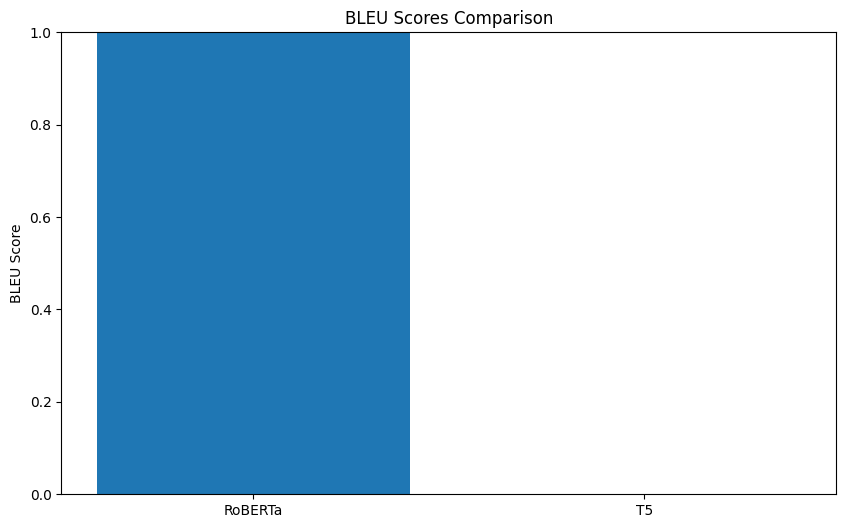

In [23]:
print(f'SCOOOORE : {scores}')
print(f'Score {scores}')
plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values())
plt.title('BLEU Scores Comparison')
plt.ylabel('BLEU Score')
plt.ylim(0, 1)
plt.show()

In [24]:
print("\nGenerated Texts:")
print(f"RoBERTa: {roberta_output}")
print(f"T5: {t5_output}")


Generated Texts:
RoBERTa: Once upon a time, in a galaxy far, far away, there was an advanced civilization that lived in harmony with nature.
T5: Einstmals, in einer Galaxie weit, weit entfernt, gab es eine fortschrittliche Zivilisation, die in Harmonie mit der Natur lebte.
